<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week8/day2/Ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'data-2.csv'
data = pd.read_csv(file_path)

In [5]:
missing_values = data.isnull().sum()
missing_values_handling = "No handling needed" if missing_values.sum() == 0 else "Handling needed"

missing_values, missing_values_handling

(id                           0
 diagnosis                    0
 radius_mean                  0
 texture_mean                 0
 perimeter_mean               0
 area_mean                    0
 smoothness_mean              0
 compactness_mean             0
 concavity_mean               0
 concave points_mean          0
 symmetry_mean                0
 fractal_dimension_mean       0
 radius_se                    0
 texture_se                   0
 perimeter_se                 0
 area_se                      0
 smoothness_se                0
 compactness_se               0
 concavity_se                 0
 concave points_se            0
 symmetry_se                  0
 fractal_dimension_se         0
 radius_worst                 0
 texture_worst                0
 perimeter_worst              0
 area_worst                   0
 smoothness_worst             0
 compactness_worst            0
 concavity_worst              0
 concave points_worst         0
 symmetry_worst               0
 fractal

In [8]:
data_cleaned = data.drop(columns=['Unnamed: 32', 'id'])

<ipython-input-13-c4ca699ef1a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data_cleaned, palette='magma')


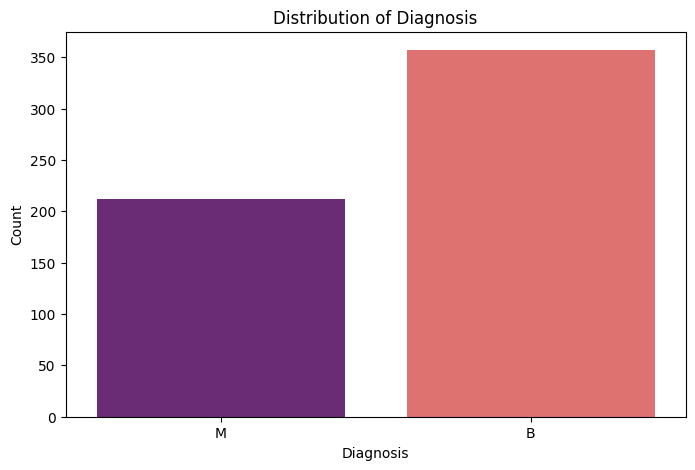

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosis', data=data_cleaned, palette='magma')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

data_cleaned.head()

In [16]:
diagnosis_counts = data_cleaned['diagnosis'].value_counts()
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})
diagnosis_counts, data_cleaned.head()

(Series([], Name: diagnosis, dtype: int64),
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0        NaN        17.99         10.38          122.80     1001.0   
 1        NaN        20.57         17.77          132.90     1326.0   
 2        NaN        19.69         21.25          130.00     1203.0   
 3        NaN        11.42         20.38           77.58      386.1   
 4        NaN        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    symmetry_mean  ...  radius_worst  texture_worst  perim

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = data_cleaned.drop('diagnosis', axis=1)
y = data_cleaned['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=10000)
knn_model = KNeighborsClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC()

models = [logistic_model, knn_model, random_forest_model, svm_model]
model_names = ['Logistic Regression', 'K Nearest Neighbours', 'Random Forest', 'SVM']
accuracies = {}

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

accuracies


ValueError: Input y contains NaN.

The Random Forest classifier shows the highest accuracy among the four models with an accuracy of 96.49%.